# Introduction

In [20]:
import custom_onnx
import numpy as np
from jupyter_ui_poll import ui_events
import time

In [21]:
from PIL import Image as PILImage
from io import BytesIO
f = BytesIO()
filetype = "PNG"
PILImage.open("cat.jpg").save(f, filetype)
data=f.getvalue()

In [52]:

def load_process(f,size=(320,320)):
    im_pil=PILImage.open(f).resize(size,PILImage.Resampling.NEAREST)
    im_np=np.array(im_pil)
    im=im_np.astype(np.float32)
    print(im.shape)
    im=np.expand_dims(np.transpose(im, (2,0,1)),axis=0)/255
    return im

In [34]:
w = custom_onnx.ExampleWidget(model_path="./u2netp.onnx")
#w.value="model.onnx"
#w.image_data=bytes(im)
w

init widget


ExampleWidget(model_path='./u2netp.onnx')

In [48]:
class onnxInference():
    def __init__(self, model_path):
        self.onnx_widget=custom_onnx.ExampleWidget(model_path=model_path)
        with ui_events() as poll:

            while  self.onnx_widget.initialized is False:
                poll(10)          # React to UI events (upto 10 at a time)
                print('.', end='')
                time.sleep(0.1)
            print("init done") 
    def run(self,image):
        self.onnx_widget.array=image
        with ui_events() as poll:

            while  self.onnx_widget.done is False:
                poll(10)          # React to UI events (upto 10 at a time)
                print('.', end='')
                time.sleep(0.1)
                
        self.onnx_widget.done=False
        return  self.onnx_widget.array_out



init widget
....init done
(1, 3, 320, 320)
(320, 320, 3)
...............................

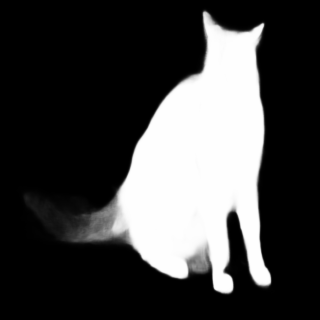

(320, 320, 3)
..............................

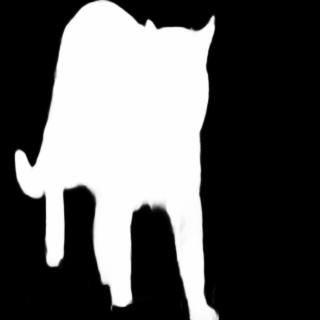

In [53]:
onnx_inf=onnxInference("./u2netp.onnx")

print(im.shape)
im=load_process('cat.jpg')
im_out=onnx_inf.run(im)
display(PILImage.fromarray((im_out.squeeze()*255).astype(np.uint8)))
im=load_process('cat_2.jpg')
im_out=onnx_inf.run(im)
display(PILImage.fromarray((im_out.squeeze()*255).astype(np.uint8)))
